In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import statsmodels.api as sm

In [4]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
import sklearn.metrics as metrics


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
df=pd.read_csv(r'C:\Users\DELL\Downloads\data (5).csv')

In [9]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [10]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [11]:
df.shape

(4600, 18)

In [12]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [14]:
df.describe(include='all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,4600,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600,4600,4600,4600
unique,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4525,44,77,1
top,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1573,148,4600
mean,NaN,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,NaN,NaN,NaN,NaN
std,NaN,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,NaN,NaN,NaN,NaN


In [15]:
x1=df.drop(['price','date','street','city','statezip','country'],axis=1)


In [16]:
y=df['price']

In [17]:
df[df==0].count()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

In [18]:
zeroprice=df[df['price']==0]

In [19]:
zeroprice.describe().T

,count,mean,std,min,25%,50%,75%,max
price,49.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
bedrooms,49.0,3.979592,1.108486,1.0,3.0,4.0,5.0,6.00
bathrooms,49.0,2.698980,1.194584,1.0,2.0,2.5,3.5,6.25
sqft_living,49.0,2787.142857,1354.375625,720.0,1910.0,2600.0,3500.0,8020.00
sqft_lot,49.0,16453.306122,27739.227932,3500.0,6863.0,9000.0,13783.0,188200.00
floors,49.0,1.500000,0.520416,1.0,1.0,1.5,2.0,3.00
waterfront,49.0,0.061224,0.242226,0.0,0.0,0.0,0.0,1.00
view,49.0,0.795918,1.485760,0.0,0.0,0.0,0.0,4.00
condition,49.0,3.673469,0.826331,2.0,3.0,3.0,4.0,5.00
sqft_above,49.0,2295.714286,1337.148708,720.0,1310.0,1990.0,3020.0,8020.00


In [20]:
corr_matrix=df.corr()

In [21]:
#fig , ax =plt.subplots(figsize(15,3))

<AxesSubplot:>

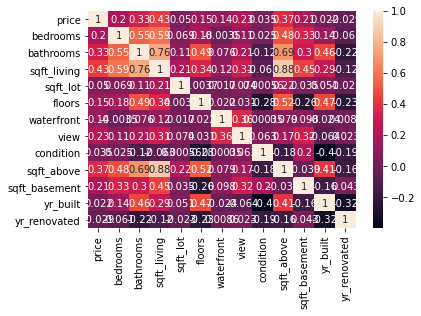

In [22]:
sns.heatmap(corr_matrix,annot=True)

In [23]:
low_price_data=df[(df['sqft_living']<zeroprice['sqft_living'].median())&
                  (df['bathrooms']<zeroprice['bathrooms'].median())&
                  (df['sqft_above']<zeroprice['sqft_above'].median())]
low_price = low_price_data.price.median()

high_price_data=df[(df['sqft_living']>zeroprice['sqft_living'].median())&
                 (df['bathrooms']>zeroprice['bathrooms'].median())&
                  (df['sqft_above']>zeroprice['sqft_above'].median())]
high_price = high_price_data.price.median()

data_prc=df.copy()
data_prc['price']=np.where(((data_prc['price']==0) & (data_prc['sqft_living']>zeroprice['sqft_living'].median())),
high_price,data_prc.price)

data_prc['price']=np.where(((data_prc['price']==0) & (data_prc['sqft_living']<=zeroprice['sqft_living'].median())),
low_price,data_prc.price) 

data_prc.price[data_prc.price==0].count()


0

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'bedrooms')

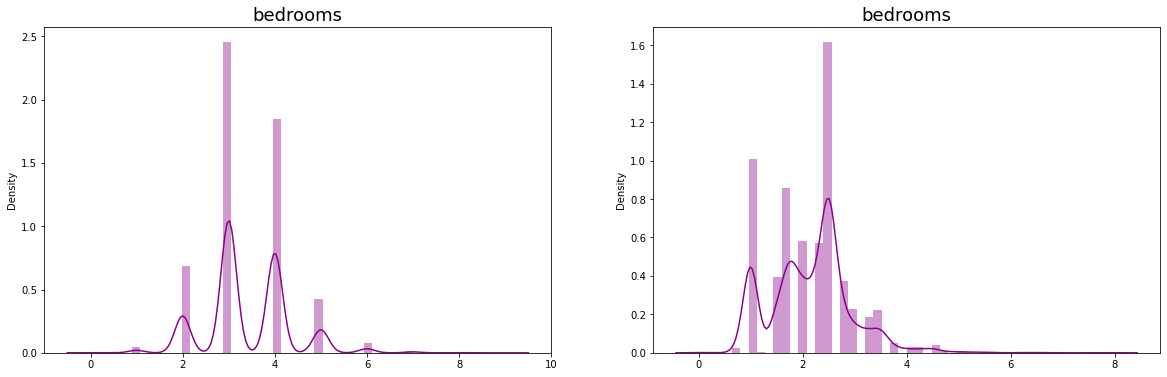

In [24]:
fig , ax = plt.subplots(1,2,figsize=(20,6))
sns.distplot(ax=ax[0],x=data_prc.bedrooms,color='darkmagenta')
ax[0].set_title('bedrooms' ,size=18)
sns.distplot(ax=ax[1],x = data_prc.bathrooms,color='darkmagenta')
ax[1].set_title('bedrooms',size=18)

In [25]:
data_prc.groupby('bedrooms')[['bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
                               'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']].mean()

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
bedrooms,,,,,,,,,,,
0.0,0.000000,3937.000000,16386.000000,2.750000,0.000000,1.000000,3.000000,3937.000000,0.000000,1990.000000,2009.000000
1.0,1.072368,822.105263,9425.710526,1.144737,0.000000,0.000000,3.263158,771.578947,50.526316,1947.289474,994.684211
2.0,1.401943,1247.268551,12137.515901,1.303004,0.012367,0.197880,3.434629,1118.971731,128.296820,1954.842756,1014.929329
3.0,1.996924,1829.022638,13249.980315,1.472195,0.006890,0.187008,3.465551,1595.616634,233.406004,1971.444390,804.400098
4.0,2.472894,2608.437622,16609.540823,1.627694,0.003919,0.254082,3.416721,2237.169170,371.268452,1976.591117,739.542129
5.0,2.859065,3140.390935,18985.892351,1.576487,0.014164,0.439093,3.541076,2437.654391,702.736544,1972.586402,750.175637
6.0,2.979508,3321.606557,24394.918033,1.631148,0.016393,0.901639,3.655738,2488.327869,833.278689,1956.885246,847.737705
7.0,4.285714,4542.857143,35525.071429,1.714286,0.000000,0.785714,3.357143,3439.285714,1103.571429,1964.000000,1144.357143
8.0,3.125000,3615.000000,6587.500000,1.500000,0.000000,1.500000,4.000000,2305.000000,1310.000000,1968.000000,1002.000000


In [26]:
data_prc['bedrooms'] =data_prc['bedrooms'].replace(0,np.NaN)
data_prc['bedrooms'] =data_prc['bedrooms'].fillna(data_prc.bedrooms.median())
data_prc.bedrooms[data_prc.bedrooms==0].count()

0

In [27]:
data_prc['bathrooms'].replace(to_replace = 0, value = data_prc.bathrooms.median(), inplace= True)

data_prc.bathrooms[data_prc.bathrooms==0].count()

0

In [28]:
data_prc.groupby('bedrooms')[['bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']].mean()

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
bedrooms,,,,,,,,,,,
1.0,1.072368,822.105263,9425.710526,1.144737,0.000000,0.000000,3.263158,771.578947,50.526316,1947.289474,994.684211
2.0,1.401943,1247.268551,12137.515901,1.303004,0.012367,0.197880,3.434629,1118.971731,128.296820,1954.842756,1014.929329
3.0,1.997173,1831.095379,13253.063913,1.473451,0.006883,0.187807,3.465093,1597.918879,233.176500,1971.462635,805.584562
4.0,2.472894,2608.437622,16609.540823,1.627694,0.003919,0.254082,3.416721,2237.169170,371.268452,1976.591117,739.542129
5.0,2.859065,3140.390935,18985.892351,1.576487,0.014164,0.439093,3.541076,2437.654391,702.736544,1972.586402,750.175637
6.0,2.979508,3321.606557,24394.918033,1.631148,0.016393,0.901639,3.655738,2488.327869,833.278689,1956.885246,847.737705
7.0,4.285714,4542.857143,35525.071429,1.714286,0.000000,0.785714,3.357143,3439.285714,1103.571429,1964.000000,1144.357143
8.0,3.125000,3615.000000,6587.500000,1.500000,0.000000,1.500000,4.000000,2305.000000,1310.000000,1968.000000,1002.000000
9.0,4.500000,3830.000000,6988.000000,2.500000,0.000000,0.000000,3.000000,2450.000000,1380.000000,1938.000000,2003.000000


In [29]:
# outliers

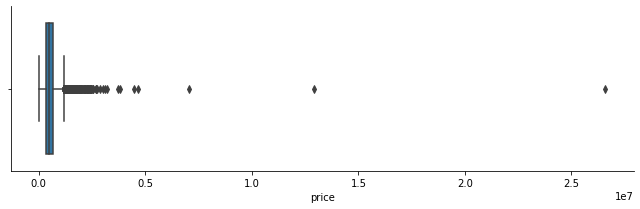

In [30]:
sns.catplot(x='price', data=data_prc, kind='box', height=3, aspect=3)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

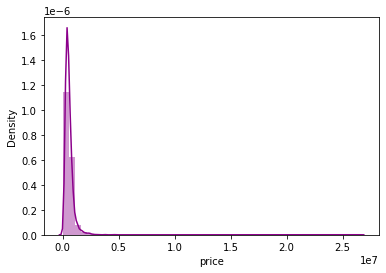

In [31]:
sns.distplot(data_prc.price, color='darkmagenta')

In [32]:
# I will use the IQR measurement for removing outliers.

Q75 = np.percentile(data_prc['price'],75)
Q25 = np.percentile(data_prc['price'],25)
IQR = Q75-Q25
cutoff = IQR * 1.5
upper = Q75 + cutoff
lower = 1

data1 = data_prc[(data_prc['price']<upper)]

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


25.070457468172982 , 0.7257728771054042


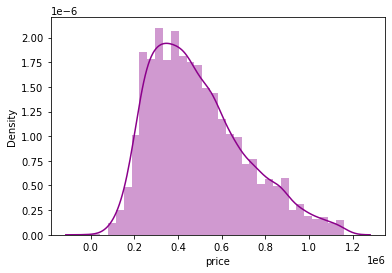

In [33]:
# What a change!

sns.distplot(data1.price, color='darkmagenta') 

print(data_prc['price'].skew(),',', data1['price'].skew())

In [34]:
data1.columns.values


array(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'street', 'city', 'statezip', 'country'], dtype=object)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

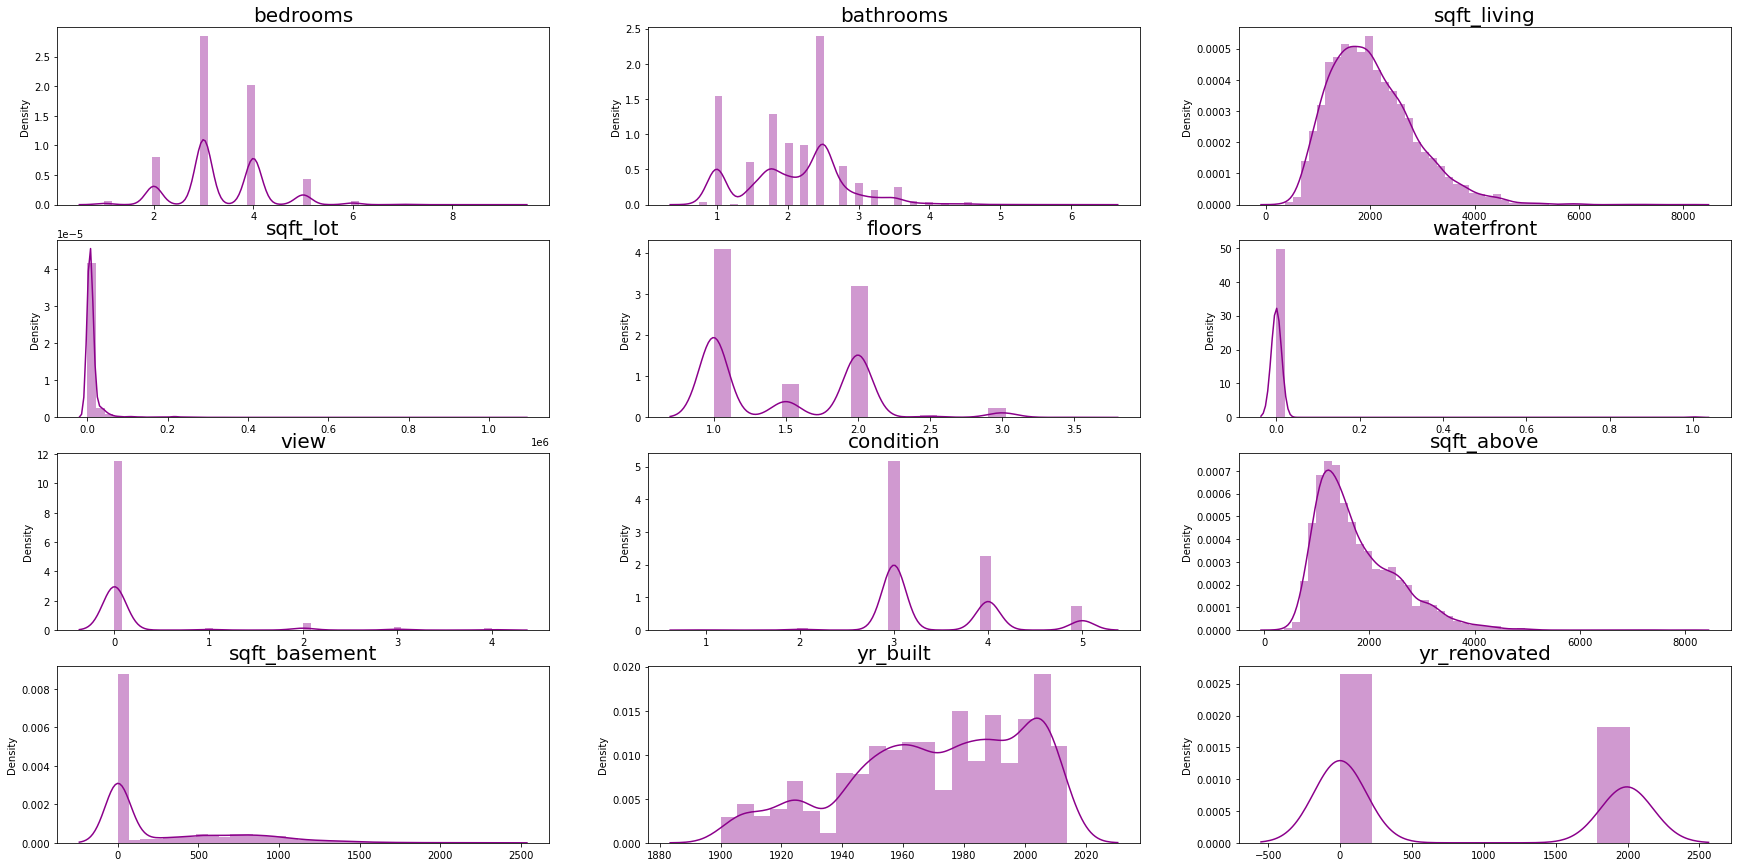

In [35]:
# Let's look other variables.

cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

fig, ax = plt.subplots(4,3, figsize = (30,15))

for idx, col in enumerate(cols):
    rn = math.floor(idx/3)
    cn = idx%3
    sns.distplot(ax=ax[rn,cn], x=data1[col], color='darkmagenta')
    ax[rn,cn].set_title(col, size=20)

1.0      38
2.0     562
3.0    1990
4.0    1414
5.0     297
6.0      49
7.0      10
8.0       1
9.0       1
Name: bedrooms, dtype: int64


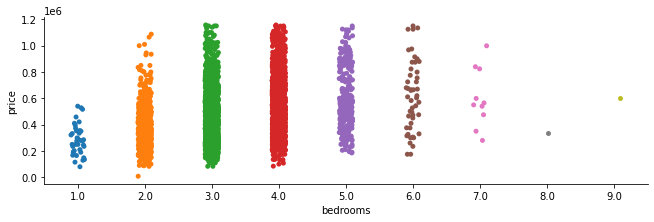

In [36]:
# bedrooms:
print(data1.bedrooms.value_counts().sort_index())
sns.catplot(x='bedrooms', y='price', data=data1, height=3, aspect=3)

In [37]:
# The number of houses with 7,8 and 9 bedrooms seems very low. 
# I will subtract these values

data2 = data1[data1.bedrooms<7]


In [38]:
# I could not understand the meaning of 0.75 or 1.25 bathroom houses. 
# I'll first convert their types to integers.

data2.bathrooms.value_counts().sort_index()

0.75      17
1.00     742
1.25       3
1.50     288
1.75     620
2.00     422
2.25     404
2.50    1148
2.75     261
3.00     147
3.25     103
3.50     120
3.75      28
4.00      15
4.25      11
4.50      12
4.75       2
5.00       4
5.25       1
5.50       1
6.25       1
Name: bathrooms, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0      17
1    1653
2    2235
3     398
4      40
5       6
6       1
Name: bathrooms, dtype: int64


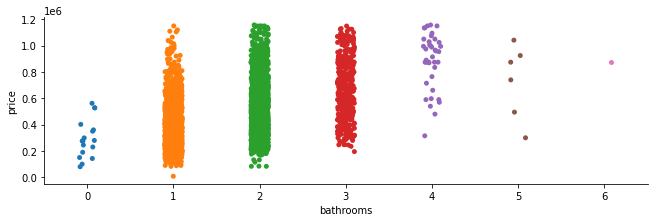

In [39]:
data2.bathrooms = data2.bathrooms.astype(int)
print(data2.bathrooms.value_counts().sort_index())

sns.catplot(x='bathrooms', y='price', data=data2, height=3, aspect=3)

In [40]:
data3 = data2[data2.bathrooms<4]

In [41]:
q = data3.sqft_living.quantile(0.99)
data4 = data3[data3.sqft_living<q]
print(data3.sqft_living.skew(),',', data4.sqft_living.skew())


0.7556982006741865 , 0.5233236461468229


(-100000.0, 1300000.0)

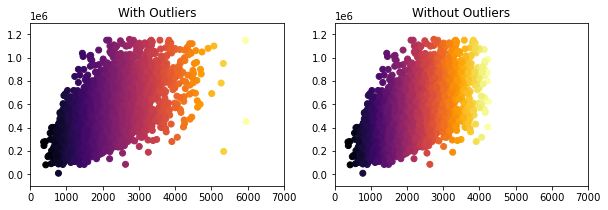

In [42]:
# There is still some skew
# But when we look at the price versus scatter plot, it looks much better now.

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,3))

ax1.scatter(x= 'sqft_living', y= 'price', data = data3, c= 'sqft_living', cmap='inferno')
ax1.set_title('With Outliers')
ax1.set_xlim(0,7000)
ax1.set_ylim(-0.1e6,1.3e6)
ax2.scatter(x= 'sqft_living', y= 'price', data = data4, c= 'sqft_living', cmap='inferno')
ax2.set_title('Without Outliers')
ax2.set_xlim(0,7000)
ax2.set_ylim(-0.1e6,1.3e6)

In [43]:
q = data4.sqft_lot.quantile(0.99)
data5 = data4[data4.sqft_lot<q]


Text(0.5, 1.0, 'Without Outliers')

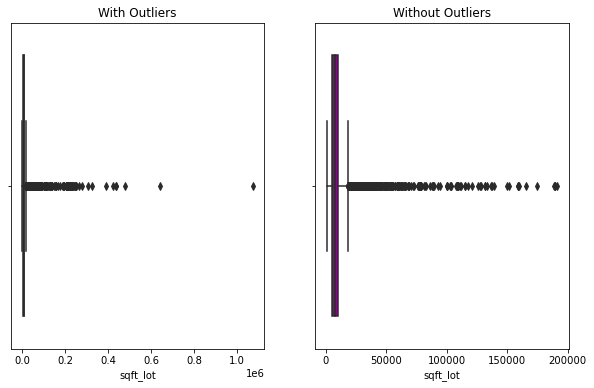

In [44]:
# Let's compare the boxplots this time, there is a visible improvement.

fig, ax = plt.subplots(1,2, figsize=(10,6))

sns.boxplot(ax=ax[0], x=data4.sqft_lot, color = 'darkmagenta')
ax[0].set_title('With Outliers')
sns.boxplot(ax=ax[1], x=data5.sqft_lot, color = 'darkmagenta')
ax[1].set_title('Without Outliers')

In [45]:
data5.floors.value_counts()

1.0    2097
2.0    1566
1.5     409
3.0     119
2.5      23
3.5       2
Name: floors, dtype: int64

1    2506
2    1589
3     121
Name: floors, dtype: int64


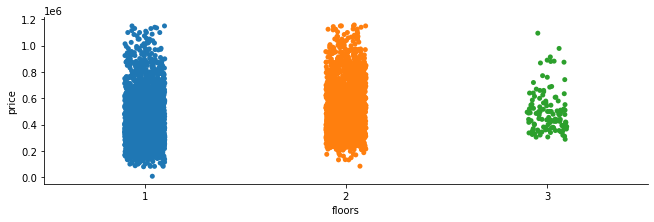

In [46]:
# Again, I will convert the data type to integer.

data6 = data5.copy()
data6.floors = data6.floors.astype(int)
print(data6.floors.value_counts())

sns.catplot(x='floors', y='price', data=data6, height=3, aspect=3)

In [47]:
# As I said at the beginning, Waterfront is divided into two categories, I will keep it that way.

data6.waterfront.value_counts()

0    4200
1      16
Name: waterfront, dtype: int64

In [48]:
# Since the number of house with a view is very few, it will be more useful for our analysis to see this feature as 0 and 1. 

print(data6.view.value_counts())

data7=data6.copy()
data7.view = data7.view.map({0:0, 1:1, 2:1, 3:1, 4:1})
print(data7.view.value_counts())

0    3911
2     154
3      64
1      54
4      33
Name: view, dtype: int64
0    3911
1     305
Name: view, dtype: int64


In [49]:
# There doesn't seem to be many homes in bad shape in the US, I'll just remove 1's.

print(data7.condition.value_counts())

data7 = data7[data7['condition']>1]

3    2623
4    1171
5     386
2      30
1       6
Name: condition, dtype: int64


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_above'>

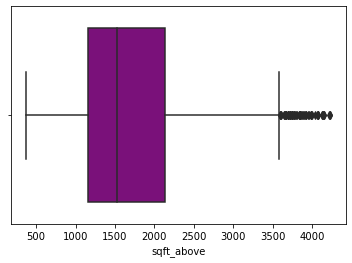

In [50]:
# I will keep sqft_above as is.

data8 = data7.copy()
sns.boxplot(data7.sqft_above, color= 'darkmagenta')

In [51]:
# I think removing 1% would be enough.

q = data8.sqft_basement.quantile(0.99)
data9 = data8[data8.sqft_basement<q]

(-100000.0, 1250000.0)

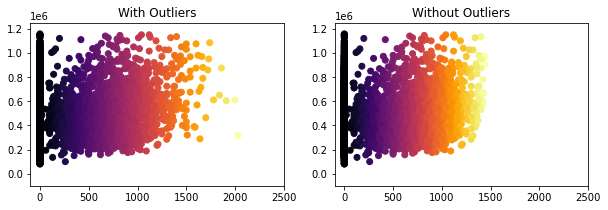

In [52]:
# There are many houses that do not have a basement.

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,3))

ax1.scatter(x= 'sqft_basement', y= 'price', data = data8, c= 'sqft_basement', cmap='inferno')
ax1.set_title('With Outliers')
ax1.set_xlim(-100,2500)
ax1.set_ylim(-0.1e6,1.25e6)
ax2.scatter(x= 'sqft_basement', y= 'price', data = data9, c= 'sqft_basement', cmap='inferno')
ax2.set_title('Without Outliers')
ax2.set_xlim(-100,2500)
ax2.set_ylim(-0.1e6,1.25e6)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='yr_built'>

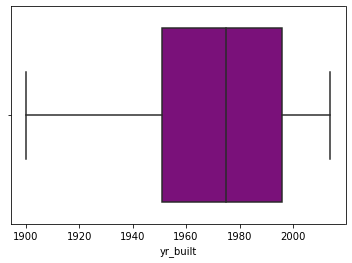

In [53]:
# I will keep building year as is.

sns.boxplot(data9.yr_built, color= 'darkmagenta')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yr_renovated', ylabel='Density'>

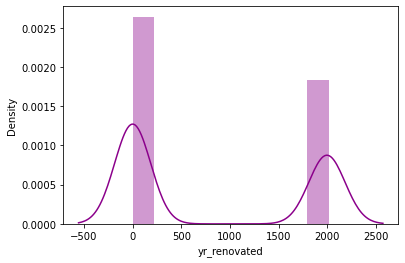

In [54]:
#This is the last feature I will take as renovated(1) not (0).

sns.distplot(data9.yr_renovated, color= 'darkmagenta')

In [55]:
data9.yr_renovated = pd.np.where(data9.yr_renovated==0,0,1)

<ipython-input-55-ab50fc7d70ed>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  data9.yr_renovated = pd.np.where(data9.yr_renovated==0,0,1)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [56]:
# We've removed most of the outliers. First I'll just continue with numeric values.
# Let's continue by dropping the categorical variables and saving it as a separate data set.

data_pp = data9.drop(['date', 'city', 'street', 'statezip', 'country'], axis=1)
data_pp.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4167.0,478474.534624,208784.796665,80000.0,315684.35,440000.0,602250.0,1157400.0
bedrooms,4167.0,3.317495,0.844478,1.0,3.00,3.0,4.0,6.0
bathrooms,4167.0,1.681785,0.623212,0.0,1.00,2.0,2.0,3.0
sqft_living,4167.0,1965.253180,721.459840,370.0,1410.00,1890.0,2440.0,4240.0
sqft_lot,4167.0,11192.053516,16057.534463,638.0,5000.00,7476.0,10280.5,191228.0
floors,4167.0,1.439405,0.551794,1.0,1.00,1.0,2.0,3.0
waterfront,4167.0,0.003840,0.061854,0.0,0.00,0.0,0.0,1.0
view,4167.0,0.069354,0.254086,0.0,0.00,0.0,0.0,1.0
condition,4167.0,3.451884,0.665684,2.0,3.00,3.0,4.0,5.0
sqft_above,4167.0,1703.894648,710.554020,370.0,1160.00,1510.0,2137.0,4230.0


In [57]:
# scaling the data

In [58]:
data_pp = data_pp.reset_index(drop=True)

In [59]:
# Define the targets and inputs.

targets = data_pp.iloc[:,:1]
unscaled_inputs = data_pp.drop(['price'], axis = 1)

unscaled_inputs.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1,1340,7912,1,0,0,3,1340,0,1955,1
1,3.0,2,1930,11947,1,0,0,4,1930,0,1966,0
2,3.0,2,2000,8030,1,0,0,4,1000,1000,1963,0
3,4.0,2,1940,10500,1,0,0,4,1140,800,1976,1
4,2.0,1,880,6380,1,0,0,3,880,0,1938,1


In [60]:
# We will divide our data into train and test groups. This is important to avoid overfitting or underfitting.
# Overfitting means, our training has focused on the particular training data set so much, so it has missed the point. 
# Underfitting means the model has not captured the underlying logic of the data.

x_train, x_test, y_train, y_test = train_test_split(unscaled_inputs, targets, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(3333, 12) (3333, 1) (834, 12) (834, 1)


In [61]:
# I will keep features that contain only 0 or 1 data separately.

columns_to_scale = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'condition', 'sqft_above', 'sqft_basement',
       'yr_built']
columns_to_omit = ['waterfront','view','yr_renovated']
x_train_to_scale = x_train[columns_to_scale]
x_test_to_scale = x_test[columns_to_scale]
x_train_not_to_scale = x_train[columns_to_omit].reset_index(drop=True)
x_test_not_to_scale = x_test[columns_to_omit].reset_index(drop=True)

In [62]:
# Let's fit the scaler using only the training data, then transform both training and test data.

scaler = RobustScaler()  #StandardScaler()
scaler.fit(x_train_to_scale)

RobustScaler()

In [63]:
x_train_scaled = scaler.transform(x_train_to_scale)

In [64]:
x_test_scaled = scaler.transform(x_test_to_scale)

In [65]:
# After scaling our training and test data are converted to np.arrays,
# Let's make them pd.DataFrame again and merge them with unscaled features.

x_train_scaled = pd.DataFrame(x_train_scaled, columns=columns_to_scale)
x_train = pd.concat([x_train_scaled,x_train_not_to_scale], axis=1)
y_train = y_train.reset_index(drop=True)

x_test_scaled = pd.DataFrame(x_test_scaled, columns=columns_to_scale)
x_test = pd.concat([x_test_scaled,x_test_not_to_scale], axis=1)
y_test = y_test.reset_index(drop=True)

In [66]:
# Now, we are ready!

x_train.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,waterfront,view,yr_renovated
0,0.0,0.0,-0.215686,-0.716920,0.0,2.0,-0.536082,1.301887,-1.155556,0,0,1
1,0.0,-1.0,-0.254902,0.344106,0.0,1.0,0.134021,0.000000,-0.155556,0,0,0


In [67]:
# model linear regression

In [68]:
# Let's create the model as we did at the beginning.

x = sm.add_constant(x_train)
results = sm.OLS(y_train, x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     257.4
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        21:52:31   Log-Likelihood:                -44524.
No. Observations:                3333   AIC:                         8.907e+04
Df Residuals:                    3321   BIC:                         8.915e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.748e+05   6663.309     56.242      0.000    3.62e+05    3.88e+05
bedrooms      -2.646e+04   4046.424     -6.538      0.000   -3.44e+04   -1.85e+04
bathrooms      2.809e+04   6043.273      4.648      0.000    1.62e+04    3.99e+04
sqft_living    3.958e+04   3452.131     11.465      0.000    3.28e+04    4.63e+04
sqft_lot      -3626.6854    943.429     -3.844      0.000   -5476.446   -1776.924
floors         5.941e+04   7035.534      8.444      0.000    4.56e+04    7.32e+04
condition      2.469e+04   4835.323      5.106      0.000    1.52e+04    3.42e+04
sqft_above     1.528e+05   3346.585     45.649      0.000    1.46e+05    1.59e+05
sqft_basement  7.234e+04   3641.422     19.866      0.000    6.52e+04    7.95e+04
yr_built      -8.163e+04   5732.205    -14.241      0.000   -9.29e+04   -7.04e+04
waterfront     5055.6355   4.57e+04      0.111      0.912   -8.46e+04    9.47e+04
view           7.736e+04   1.11e+04      6.981      0.000    5.56e+04    9.91e+04
yr_renovated   5633.5680   6258.043      0.900      0.368   -6636.442    1.79e+04
==============================================================================
Omnibus:                       89.508   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.995
Skew:                           0.321   Prob(JB):                     1.07e-25
Kurtosis:                       3.646   Cond. No.                     1.67e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.14e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [69]:
# We talked about the low contribution of variables with P values above 0.05 to the model, 
# so I'm going to drop the renovation year value and run the model again.

x_train_pv = x_train.drop(['yr_renovated'], axis=1)

In [70]:
# R2 and Adj. R2 is the same as before. 
# We did well by removing it out, because it's always better to keep the equation simple.

X = sm.add_constant(x_train_pv)
results = sm.OLS(y_train, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     283.1
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        21:52:31   Log-Likelihood:                -44524.
No. Observations:                3333   AIC:                         8.907e+04
Df Residuals:                    3322   BIC:                         8.914e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.776e+05   5862.403     64.412      0.000    3.66e+05    3.89e+05
bedrooms      -2.633e+04   4043.727     -6.510      0.000   -3.43e+04   -1.84e+04
bathrooms      2.775e+04   6031.195      4.600      0.000    1.59e+04    3.96e+04
sqft_living    3.909e+04   3408.769     11.467      0.000    3.24e+04    4.58e+04
sqft_lot      -3605.3686    943.105     -3.823      0.000   -5454.494   -1756.243
floors         5.873e+04   6994.461      8.396      0.000     4.5e+04    7.24e+04
condition        2.3e+04   4457.535      5.161      0.000    1.43e+04    3.17e+04
sqft_above     1.532e+05   3308.096     46.318      0.000    1.47e+05     1.6e+05
sqft_basement  7.266e+04   3623.797     20.051      0.000    6.56e+04    7.98e+04
yr_built      -8.322e+04   5452.425    -15.264      0.000   -9.39e+04   -7.25e+04
waterfront     4936.2704   4.57e+04      0.108      0.914   -8.47e+04    9.46e+04
view            7.77e+04   1.11e+04      7.016      0.000     5.6e+04    9.94e+04
==============================================================================
Omnibus:                       89.373   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.682
Skew:                           0.321   Prob(JB):                     1.25e-25
Kurtosis:                       3.644   Cond. No.                     1.70e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [71]:
# encoding the categorical variable

In [72]:
data_wd = data9.drop(['date', 'street', 'statezip', 'country'], axis=1)

In [73]:
# Get_dummies is one of the common ways to create dummy variables for categorical features

city_dummies = pd.get_dummies(data_wd.city, drop_first = True)
city_dummies


,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4596,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4598,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [74]:
# Let's define the variables one more time.

targets = data_wd.iloc[:,:1]

a = data_wd.drop(['price','city'], axis = 1)
unscaled_inputs_wd = pd.concat([a, city_dummies], axis=1)
unscaled_inputs_wd.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,3.0,1,1340,7912,1,0,0,3,1340,0,...,0,0,1,0,0,0,0,0,0,0
2,3.0,2,1930,11947,1,0,0,4,1930,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# Split the targets and inputs into train-test data again.

x_train, x_test, y_train, y_test = train_test_split(unscaled_inputs_wd, targets, test_size=0.2, random_state = 42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3333, 55) (834, 55) (3333, 1) (834, 1)


In [76]:
x_train.columns.values

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'Auburn', 'Beaux Arts Village',
       'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 'Carnation',
       'Clyde Hill', 'Covington', 'Des Moines', 'Duvall', 'Enumclaw',
       'Fall City', 'Federal Way', 'Inglewood-Finn Hill', 'Issaquah',
       'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley',
       'Medina', 'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park',
       'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond',
       'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline',
       'Skykomish', 'Snoqualmie', 'Snoqualmie Pass', 'Tukwila', 'Vashon',
       'Woodinville', 'Yarrow Point'], dtype=object)

In [77]:
columns_to_scale = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built']
columns_to_omit = ['waterfront','view','yr_renovated', 'Auburn', 'Beaux Arts Village',
       'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 'Carnation',
       'Clyde Hill', 'Covington', 'Des Moines', 'Duvall', 'Enumclaw',
       'Fall City', 'Federal Way', 'Inglewood-Finn Hill', 'Issaquah',
       'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley',
       'Medina', 'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park',
       'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond',
       'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline',
       'Skykomish', 'Snoqualmie', 'Snoqualmie Pass', 'Tukwila', 'Vashon',
       'Woodinville', 'Yarrow Point']
x_train_to_scale = x_train[columns_to_scale]
x_test_to_scale = x_test[columns_to_scale]
x_train_not_to_scale = x_train[columns_to_omit].reset_index(drop=True)
x_test_not_to_scale = x_test[columns_to_omit].reset_index(drop=True)


In [78]:
# Scale as before

scaler = RobustScaler()


In [79]:
scaler.fit(x_train_to_scale)

RobustScaler()

In [80]:
x_train_scaled = scaler.transform(x_train_to_scale)

In [81]:
x_test_scaled = scaler.transform(x_test_to_scale)

In [82]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=columns_to_scale)
x_train = pd.concat([x_train_scaled,x_train_not_to_scale], axis=1)
y_train = y_train.reset_index(drop=True)

x_test_scaled = pd.DataFrame(x_test_scaled, columns=columns_to_scale)
x_test = pd.concat([x_test_scaled,x_test_not_to_scale], axis=1)
y_test = y_test.reset_index(drop=True)

In [83]:
#model  linear regression

In [84]:
# Yey! We managed to get much better results now.
# 'sqft_lot' and 'yr_renovated' features seems insignificant when we evaluate them according to their p-values.

X1 = sm.add_constant(x_train)
results = sm.OLS(y_train, X1).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     140.9
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        21:52:31   Log-Likelihood:                -43573.
No. Observations:                3333   AIC:                         8.725e+04
Df Residuals:                    3279   BIC:                         8.758e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.047e+05    6.3e+04      3.249      0.001    8.12e+04    3.28e+05
bedrooms            -1.432e+04   3100.673     -4.618      0.000   -2.04e+04   -8238.286
bathrooms             1.88e+04   4613.064      4.076      0.000    9757.371    2.78e+04
sqft_living          5.808e+04   1.13e+04      5.134      0.000    3.59e+04    8.03e+04
sqft_lot             1481.3927    783.494      1.891      0.059     -54.795    3017.580
floors               1.908e+04   5802.482      3.288      0.001    7704.522    3.05e+04
condition            2.677e+04   3756.132      7.128      0.000    1.94e+04    3.41e+04
sqft_above           1.241e+05   1.09e+04     11.405      0.000    1.03e+05    1.45e+05
sqft_basement        3.534e+04   6480.035      5.454      0.000    2.26e+04     4.8e+04
yr_built            -3.068e+04   5029.722     -6.099      0.000   -4.05e+04   -2.08e+04
waterfront           7.297e+04   3.82e+04      1.910      0.056   -1935.788    1.48e+05
view                 8.253e+04   8572.967      9.627      0.000    6.57e+04    9.93e+04
yr_renovated         -633.9705   4782.545     -0.133      0.895      -1e+04    8743.106
Auburn               2.539e+04   6.79e+04      0.374      0.708   -1.08e+05    1.58e+05
Beaux Arts Village   5.575e+05   1.34e+05      4.156      0.000    2.94e+05    8.21e+05
Bellevue             3.506e+05   6.77e+04      5.181      0.000    2.18e+05    4.83e+05
Black Diamond        1.195e+05   8.02e+04      1.490      0.136   -3.78e+04    2.77e+05
Bothell              1.592e+05   7.05e+04      2.258      0.024    2.09e+04    2.97e+05
Burien               1.085e+05   6.87e+04      1.578      0.115   -2.63e+04    2.43e+05
Carnation            9.039e+04   7.37e+04      1.227      0.220   -5.41e+04    2.35e+05
Clyde Hill           4.544e+05   8.51e+04      5.340      0.000    2.88e+05    6.21e+05
Covington            3.334e+04   6.99e+04      0.477      0.633   -1.04e+05     1.7e+05
Des Moines            3.98e+04   6.92e+04      0.575      0.565   -9.59e+04    1.76e+05
Duvall                1.14e+05   7.06e+04      1.615      0.106   -2.44e+04    2.52e+05
Enumclaw             8941.4019    7.2e+04      0.124      0.901   -1.32e+05     1.5e+05
Fall City            1.879e+05   7.78e+04      2.414      0.016    3.53e+04     3.4e+05
Federal Way          3.227e+04    6.8e+04      0.475      0.635   -1.01e+05    1.66e+05
Inglewood-Finn Hill  2.211e-09   8.07e-10      2.740      0.006    6.29e-10    3.79e-09
Issaquah             2.467e+05   6.79e+04      3.633      0.000    1.14e+05     3.8e+05
Kenmore              1.669e+05   6.89e+04      2.421      0.016    3.17e+04    3.02e+05
Kent                 2.754e+04   6.78e+04      0.406      0.685   -1.05e+05     1.6e+05
Kirkland             2.793e+05   6.78e+04      4.120      0.000    1.46e+05    4.12e+05
Lak

In [85]:
x_train.columns.values

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_above', 'sqft_basement', 'yr_built',
       'waterfront', 'view', 'yr_renovated', 'Auburn',
       'Beaux Arts Village', 'Bellevue', 'Black Diamond', 'Bothell',
       'Burien', 'Carnation', 'Clyde Hill', 'Covington', 'Des Moines',
       'Duvall', 'Enumclaw', 'Fall City', 'Federal Way',
       'Inglewood-Finn Hill', 'Issaquah', 'Kenmore', 'Kent', 'Kirkland',
       'Lake Forest Park', 'Maple Valley', 'Medina', 'Mercer Island',
       'Milton', 'Newcastle', 'Normandy Park', 'North Bend', 'Pacific',
       'Preston', 'Ravensdale', 'Redmond', 'Renton', 'Sammamish',
       'SeaTac', 'Seattle', 'Shoreline', 'Skykomish', 'Snoqualmie',
       'Snoqualmie Pass', 'Tukwila', 'Vashon', 'Woodinville',
       'Yarrow Point'], dtype=object)

In [86]:
# Let's check if there are multicollunearity.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# all features where we want to check for multicollinearity:
variables = x_train[[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition',  'sqft_basement',
       'yr_built', 'view', 'yr_renovated', 'Auburn', 'Beaux Arts Village',
       'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 'Carnation',
       'Clyde Hill', 'Covington', 'Des Moines', 'Duvall', 'Enumclaw',
       'Fall City', 'Federal Way', 'Inglewood-Finn Hill', 'Issaquah',
       'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley',
       'Medina', 'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park',
       'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond',
       'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline',
       'Skykomish', 'Snoqualmie', 'Snoqualmie Pass', 'Tukwila', 'Vashon',
       'Woodinville', 'Yarrow Point']]

# we create a new data frame which will include all the VIFs, 
# each variable has its own VIF as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

# Finally, I will include names so it is easier to explore the result
vif["Features"] = variables.columns

vif.sort_values(by='VIF')

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,VIF,Features
32,1.004646,Medina
12,1.004922,Beaux Arts Village
34,1.006007,Milton
40,1.006948,Ravensdale
49,1.006966,Snoqualmie Pass
39,1.008650,Preston
38,1.008656,Pacific
47,1.012019,Skykomish
53,1.015874,Yarrow Point
14,1.017005,Black Diamond


In [87]:
# I will drop 'sqft_above' based on features VIF scores, 
# also 'sqft_lot' and 'yr_renovated' based on p-value that we have already determined.

x_train = x_train.drop(['sqft_above','sqft_lot','yr_renovated'], axis=1)
x_test = x_test.drop(['sqft_above','sqft_lot','yr_renovated'], axis=1)

In [88]:
# This time let's use sklearn to build our model.

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

<AxesSubplot:ylabel='Count'>

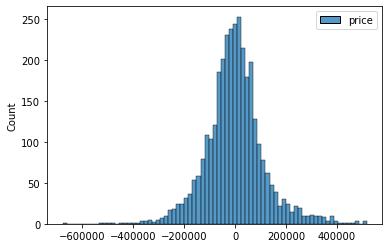

In [89]:
# Let's check the assumption of normality. 
# It seems quite good, right :)

y_hat = reg.predict(x_train)

sns.histplot(y_train - y_hat)

In [90]:
# To measure adjusted R2, I will write a simple function. (Train)

def adj_R2(x_train,y_train):
  r2 = reg.score(x_train,y_train)
  n = x_train.shape[0]
  p = x_train.shape[1]
  adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
  return adjusted_r2

adj_R2 = adj_R2(x_train,y_train)

In [91]:
# To measure adjusted R2, I will write a simple function. (Test)

def adj_R2_test(x_test,y_test):
  r2 = reg.score(x_test,y_test)
  n = x_test.shape[0]
  p = x_test.shape[1]
  adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
  return adjusted_r2

adj_R2_test = adj_R2_test(x_test,y_test)

In [92]:
# Our training and test scores are very similar,
# which means that overfitting was not observed in our model. 
print('R2-Train                      : {0:.2f}'.format(reg.score(x_train, y_train)*100))
print('R2-Test                       : {0:.2f}'.format(reg.score(x_test, y_test)*100))
print('Adj_R2-Train                  : {0:.2f}'.format(adj_R2*100))
print('Adj_R2-Test                   : {0:.2f}'.format(adj_R2_test*100))
print('MSE (Mean Squared Error)      : {0:.0f}'.format(metrics.mean_squared_error(y_train, y_hat)))
print('RMSE (Root Mean Squared Error): {0:.0f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_hat))))
print('MAE (Mean Ablosute Error)     : {0:.0f}'.format(metrics.mean_absolute_error(y_train, y_hat)))

R2-Train                      : 69.46
R2-Test                       : 69.70
Adj_R2-Train                  : 68.98
Adj_R2-Test                   : 67.68
MSE (Mean Squared Error)      : 13281622417
RMSE (Root Mean Squared Error): 115246
MAE (Mean Ablosute Error)     : 83101


In [93]:
# Let's prepare a regression model summary table.

# Weights means for continuous variables: 
# positive weight = shows that as a feature increases in value, so do the price respectively
# negative weight = shows that as a feature increases in value, price decrease

# Weights means for dummy variables:
# positive weight = shows that the respective category(city) is more expensive than the benchmark
# negative weight = shows that the respective category(city) is less expensive than the benchmark 


reg_summary = pd.DataFrame(x_train.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_.reshape(-1,1)
reg_summary.index = reg_summary.index +1
reg_summary.loc[0] = ['Intercept (b0)', reg.intercept_[0]]
reg_summary = reg_summary.sort_index()
reg_summary

,Features,Weights
0,Intercept (b0),2.569647e+05
1,bedrooms,-1.459731e+04
2,bathrooms,1.851688e+04
3,sqft_living,1.903324e+05
4,floors,1.833115e+04
5,condition,2.692022e+04
6,sqft_basement,-3.284232e+04
7,yr_built,-3.115158e+04
8,waterfront,7.194858e+04
9,view,8.294878e+04
